In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading in Data

In [2]:
xb_predictions = pd.read_csv('xg_probabilities.csv')
xb_predictions = xb_predictions.drop(columns = 'Unnamed: 0')

In [3]:
xb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']
xb_predictions['predicted'] = xb_predictions['predicted'].replace(0, 'negative')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(1, 'neutral')
xb_predictions['predicted'] = xb_predictions['predicted'].replace(2, 'positive')

xb_predictions['true'] = xb_predictions['true'].replace(0, 'negative')
xb_predictions['true'] = xb_predictions['true'].replace(1, 'neutral')
xb_predictions['true'] = xb_predictions['true'].replace(2, 'positive')

In [4]:
xb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.237785,0.432915,0.329300,neutral,neutral
1,0.170718,0.184875,0.644407,positive,positive
2,0.046333,0.053068,0.900599,positive,positive
3,0.399126,0.324173,0.276701,negative,positive
4,0.229388,0.427607,0.343006,neutral,negative


In [5]:
mnb_predictions = pd.read_csv('mnb_probabilities.csv')
mnb_predictions = mnb_predictions.drop(columns = 'Unnamed: 0')

In [6]:
mnb_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [7]:
mnb_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.252893,0.280195,0.466912,positive,neutral
1,0.152652,0.125570,0.721778,positive,positive
2,0.049840,0.146845,0.803314,positive,positive
3,0.353001,0.288697,0.358302,positive,positive
4,0.260818,0.325326,0.413856,positive,negative


In [8]:
rf_predictions = pd.read_csv('rf_probabilities.csv')
rf_predictions = rf_predictions.drop(columns = 'Unnamed: 0')

In [9]:
rf_predictions.columns = ['negative_prob','neutral_prob', 'positive_prob', 'predicted', 'true']

In [10]:
rf_predictions.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
0,0.331914,0.353209,0.314877,neutral,neutral
1,0.317719,0.336702,0.345579,positive,positive
2,0.261002,0.278936,0.460062,positive,positive
3,0.356833,0.344459,0.298707,negative,positive
4,0.331409,0.353051,0.315540,neutral,negative


### Reshaping data for visualization

In [11]:
import matplotlib.patches as mpatches

red = mpatches.Patch(color='indianred', label='Negative Prediction')
blue = mpatches.Patch(color='powderblue', label='Positive Prediction')
gray = mpatches.Patch(color='lightgray', label='Neutral Prediction')

In [12]:
#True vs. Predicted
xb_pred_counts = xb_predictions.groupby(['true', 'predicted']).size().reset_index()
rf_pred_counts = rf_predictions.groupby(['true', 'predicted']).size().reset_index()
mnb_pred_counts = mnb_predictions.groupby(['true', 'predicted']).size().reset_index()

In [13]:
xb_pred_counts

,true,predicted,0
0,negative,negative,1238
1,negative,neutral,1157
2,negative,positive,539
3,neutral,negative,303
4,neutral,neutral,2319
5,neutral,positive,629
6,positive,negative,338
7,positive,neutral,1296
8,positive,positive,3783


In [14]:
rf_pivot = rf_pred_counts.pivot(index='true', columns='predicted', values=0)
mnb_pivot = mnb_pred_counts.pivot(index='true', columns='predicted', values=0)
xb_pivot = xb_pred_counts.pivot(index='true', columns='predicted', values=0)

In [15]:
rf_pivot

predicted,negative,neutral,positive
true,,,
negative,1266,1426,242
neutral,350,2648,253
positive,430,1947,3040


In [16]:
xb_pivot

predicted,negative,neutral,positive
true,,,
negative,1238,1157,539
neutral,303,2319,629
positive,338,1296,3783


In [17]:
colors = ['indianred','lightgrey','powderblue']

''

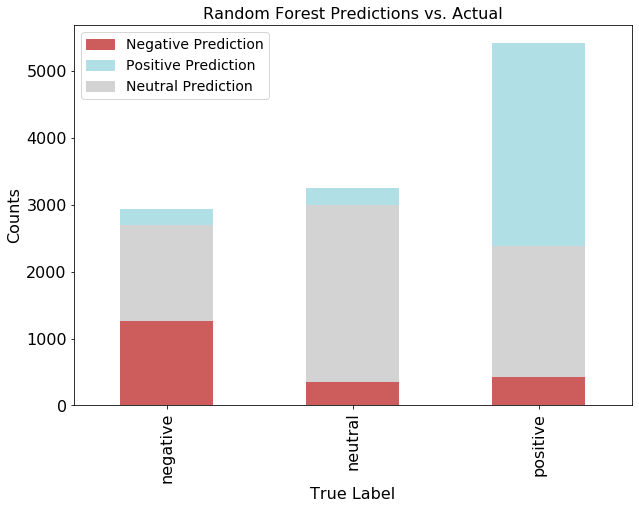

In [18]:
rf_pivot.loc[:,['negative', 'neutral', 'positive']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Random Forest Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('RF_predictions.jpeg')
;

''

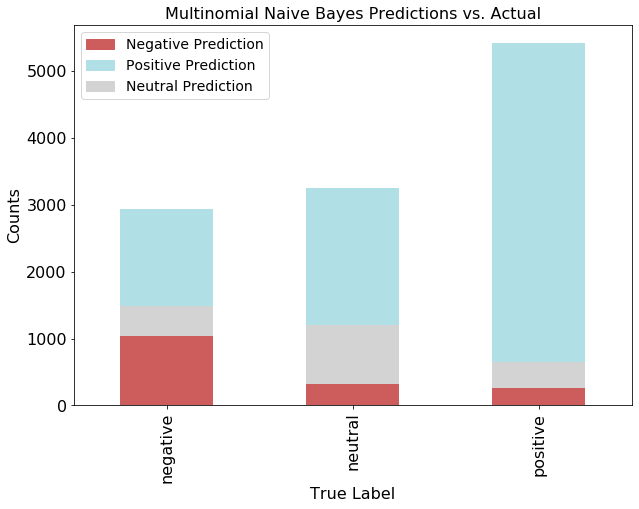

In [19]:
mnb_pivot.loc[:,['negative', 'neutral', 'positive']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('MNB_predictions.jpeg')
;

''

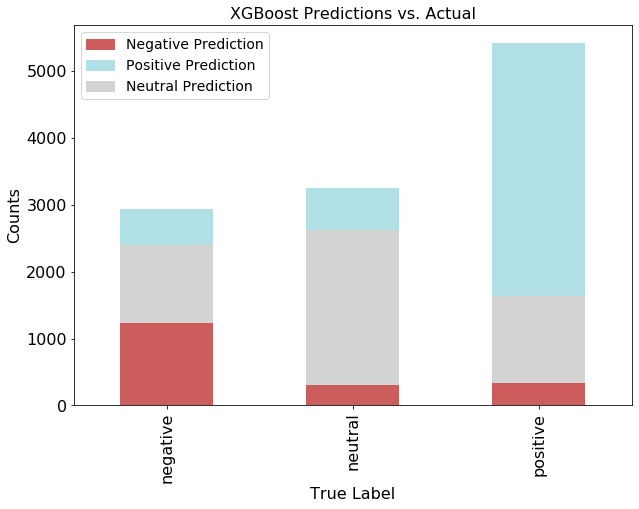

In [20]:
xb_pivot.loc[:,['negative', 'neutral', 'positive']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 16)
plt.title('XGBoost Predictions vs. Actual', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 2)
plt.savefig('XGB_predictions.jpeg')

;

In [21]:
mnb_pct = mnb_pivot
mnb_pct['total'] = mnb_pct['negative'] + mnb_pct['positive'] + mnb_pct['neutral']
mnb_pct['negative_pred'] = mnb_pct['negative']/mnb_pct['total'] * 100
mnb_pct['neutral_pred'] = mnb_pct['neutral']/mnb_pct['total'] * 100
mnb_pct['positive_pred'] = mnb_pct['positive']/mnb_pct['total'] * 100
mnb_pct

predicted,negative,neutral,positive,total,negative_pred,neutral_pred,positive_pred
true,,,,,,,
negative,1034,446,1454,2934,35.241990,15.201091,49.556919
neutral,327,873,2051,3251,10.058444,26.853276,63.088281
positive,266,387,4764,5417,4.910467,7.144176,87.945357


In [22]:
mnb_pct

predicted,negative,neutral,positive,total,negative_pred,neutral_pred,positive_pred
true,,,,,,,
negative,1034,446,1454,2934,35.241990,15.201091,49.556919
neutral,327,873,2051,3251,10.058444,26.853276,63.088281
positive,266,387,4764,5417,4.910467,7.144176,87.945357


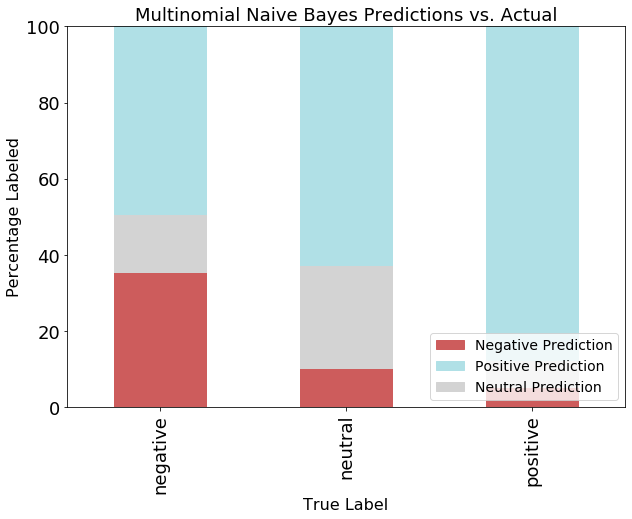

In [23]:
mnb_pct.loc[:,['negative_pred', 'neutral_pred', 'positive_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Multinomial Naive Bayes Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('MNB_predictions_pct.jpeg');

In [24]:
rf_pct = rf_pivot
rf_pct['total'] = rf_pct['negative'] + rf_pct['positive'] + rf_pct['neutral']
rf_pct['negative_pred'] = rf_pct['negative']/rf_pct['total'] * 100
rf_pct['neutral_pred'] = rf_pct['neutral']/rf_pct['total'] * 100
rf_pct['positive_pred'] = rf_pct['positive']/rf_pct['total'] * 100
rf_pct

predicted,negative,neutral,positive,total,negative_pred,neutral_pred,positive_pred
true,,,,,,,
negative,1266,1426,242,2934,43.149284,48.602590,8.248125
neutral,350,2648,253,3251,10.765918,81.451861,7.782221
positive,430,1947,3040,5417,7.937973,35.942404,56.119623


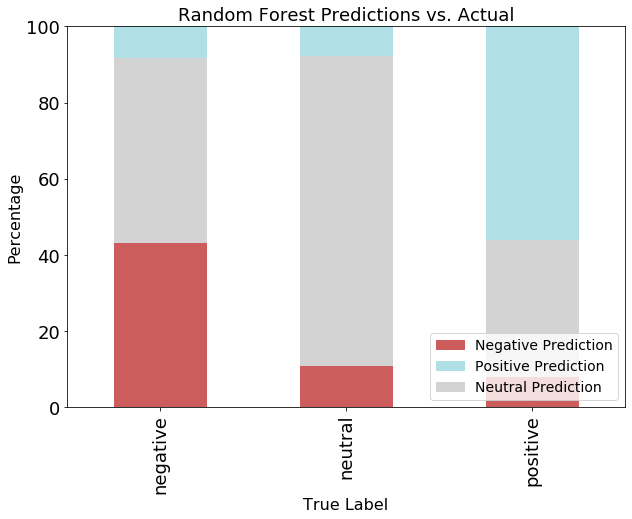

In [25]:
rf_pct.loc[:,['negative_pred', 'neutral_pred', 'positive_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('Random Forest Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.savefig('RF_predictions_pct.jpeg')
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4);

In [26]:
xb_pct = xb_pivot
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100
xb_pct

predicted,negative,neutral,positive,total,negative_pred,neutral_pred,positive_pred
true,,,,,,,
negative,1238,1157,539,2934,42.194956,39.434219,18.370825
neutral,303,2319,629,3251,9.320209,71.331898,19.347893
positive,338,1296,3783,5417,6.239616,23.924682,69.835702


In [27]:
xb_conf_matrix_pct = xb_pct.drop(columns = ['total', 'negative','neutral', 'positive'])
cs = xb_conf_matrix_pct.columns.tolist()
cs

['negative_pred', 'neutral_pred', 'positive_pred']

In [28]:
cs = ['negative', 'neutral', 'positive']
xb_conf_matrix_pct.columns = cs
xb_conf_matrix_pct.round(decimals = 2)

,negative,neutral,positive
true,,,
negative,42.19,39.43,18.37
neutral,9.32,71.33,19.35
positive,6.24,23.92,69.84


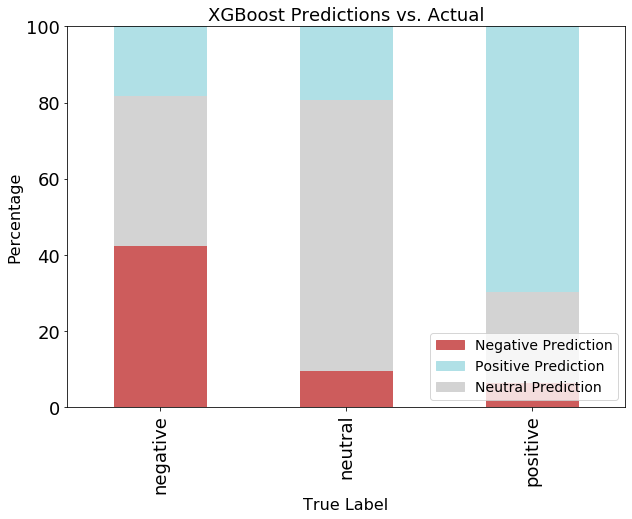

In [29]:
xb_pct.loc[:,['negative_pred', 'neutral_pred', 'positive_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Predictions vs. Actual', fontsize = 18)
plt.ylabel('Percentage', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.ylim(0, 100)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.savefig('../images/XGB_predictions_pct.jpeg');


## Comparing Across Models

In [30]:
comp = pd.read_csv('model_comparison.csv')

In [31]:
comp

,Unnamed: 0,Negative Precision,Neutral Precision,Positive Precision,Avg Precision (wt.),Negative Recall,Neutral Recall,Positive Recall,Avg Recall (wt),Negative F1-Score,Neutral F1-Score,Positive F1-Score,Avg F1-Score (wt.),Accuracy,ROC_AUC_Score
0,XGBoost,0.64,0.48,0.76,0.65,0.41,0.71,0.69,0.62,0.50,0.57,0.72,0.62,0.62,0.7960
1,ML_Perceptron,0.59,0.51,0.72,0.63,0.49,0.57,0.73,0.62,0.53,0.53,0.73,0.62,0.62,0.7980
2,Rand_Forest,0.63,0.42,0.86,0.68,0.37,0.85,0.52,0.57,0.46,0.56,0.65,0.58,0.57,0.7802
3,Multinomial_NB,0.64,0.47,0.58,0.57,0.36,0.28,0.86,0.57,0.46,0.35,0.69,0.54,0.57,0.7790
4,Bernoulli_NB,0.58,0.49,0.71,0.62,0.46,0.57,0.73,0.61,0.51,0.53,0.72,0.61,0.61,0.7900


In [32]:
#Import model comparison statistics from csv

# new_header = comp.iloc[0] #grab the first row for the header
# comp = comp[1:] #take the data less the header row
# comp.columns = new_header
comp.columns = ['Model',  'Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Weighted-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Weighted-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Weighted-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp.head()


,Model,Negative Precision,Neutral Precision,Positive Precision,Weighted-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Weighted-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Weighted-avg F1-Score,Avg Accuracy,ROC AUC Score
0,XGBoost,0.64,0.48,0.76,0.65,0.41,0.71,0.69,0.62,0.50,0.57,0.72,0.62,0.62,0.7960
1,ML_Perceptron,0.59,0.51,0.72,0.63,0.49,0.57,0.73,0.62,0.53,0.53,0.73,0.62,0.62,0.7980
2,Rand_Forest,0.63,0.42,0.86,0.68,0.37,0.85,0.52,0.57,0.46,0.56,0.65,0.58,0.57,0.7802
3,Multinomial_NB,0.64,0.47,0.58,0.57,0.36,0.28,0.86,0.57,0.46,0.35,0.69,0.54,0.57,0.7790
4,Bernoulli_NB,0.58,0.49,0.71,0.62,0.46,0.57,0.73,0.61,0.51,0.53,0.72,0.61,0.61,0.7900


In [33]:
float_cols = ['Negative Precision',   'Neutral Precision',
        'Positive Precision', 'Weighted-avg Precision',     'Negative Recall',
            'Neutral Recall',     'Positive Recall',    'Weighted-avg Recall',
         'Negative F1-Score',    'Neutral F1-Score',   'Positive F1-Score',
        'Weighted-avg F1-Score',        'Avg Accuracy', 'ROC AUC Score']
comp[float_cols] = comp[float_cols].astype(float)


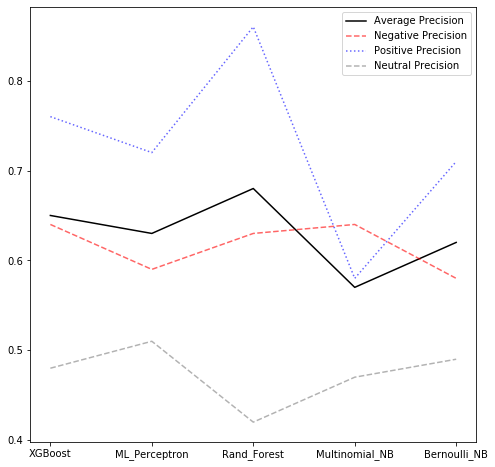

In [34]:
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(comp['Model'], comp['Weighted-avg Precision'], color = 'black', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'black', label = 'Average Precision')
ax.plot(comp['Model'], comp['Negative Precision'], color = 'red', label = 'Negative Precision', alpha = 0.6, linestyle='dashed')
ax.plot(comp['Model'], comp['Positive Precision'], color = 'blue', label = 'Positive Precision', alpha = 0.6, linestyle='dotted')
ax.plot(comp['Model'], comp['Neutral Precision'], color = 'gray', label = 'Neutral Precision', alpha = 0.6, linestyle='--')

ax.legend()
# ax.plot(comp['Model'], comp['Macro-avg Precision'], color = 'red', label = 'Average Precision')
# ax.scatter(comp['Model'], comp['Macro-avg Precision'], color = 'blue', label = 'Average Precision')

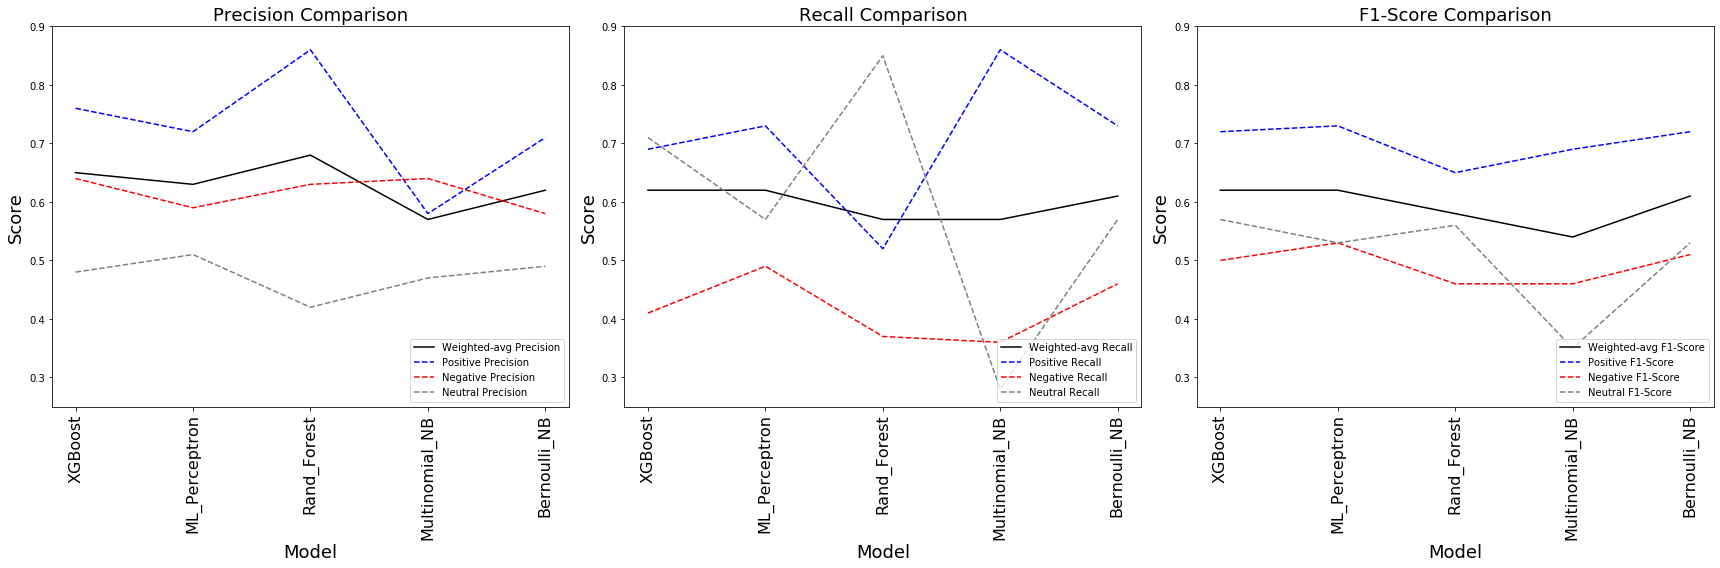

In [35]:
groups = ['Weighted-avg', 'Positive', 'Negative', 'Neutral']
metrics = ['Precision', 'Recall', 'F1-Score']
cols = ['black', 'blue', 'red', 'gray']
linestyles = ['solid', 'dashed', 'dashed', 'dashed']
titles = ['Precision Comparison', 'Recall Comparison', 'F1-Score Comparison']

fig, axs = plt.subplots(1,3, figsize = (24,8))


for ax, met, title in zip(axs.flatten(), metrics, titles):
    for gr, col, ls in zip(groups, cols, linestyles): 
        ax.plot(comp['Model'], comp[f'{gr} {met}'], color = col, label = f'{gr} {met}', linestyle = ls)
        ax.legend(loc = 4)
        ax.set_xticklabels(comp['Model'],fontsize = 16, rotation = 90)
    ax.set_title(title , fontsize = 18)
    ax.set_ylim(0.25,0.9)
    ax.set_xlabel('Model', fontsize = 18)
    ax.set_ylabel('Score', fontsize = 18)
fig.tight_layout()
fig.savefig('../images/Model_comparison.jpeg')

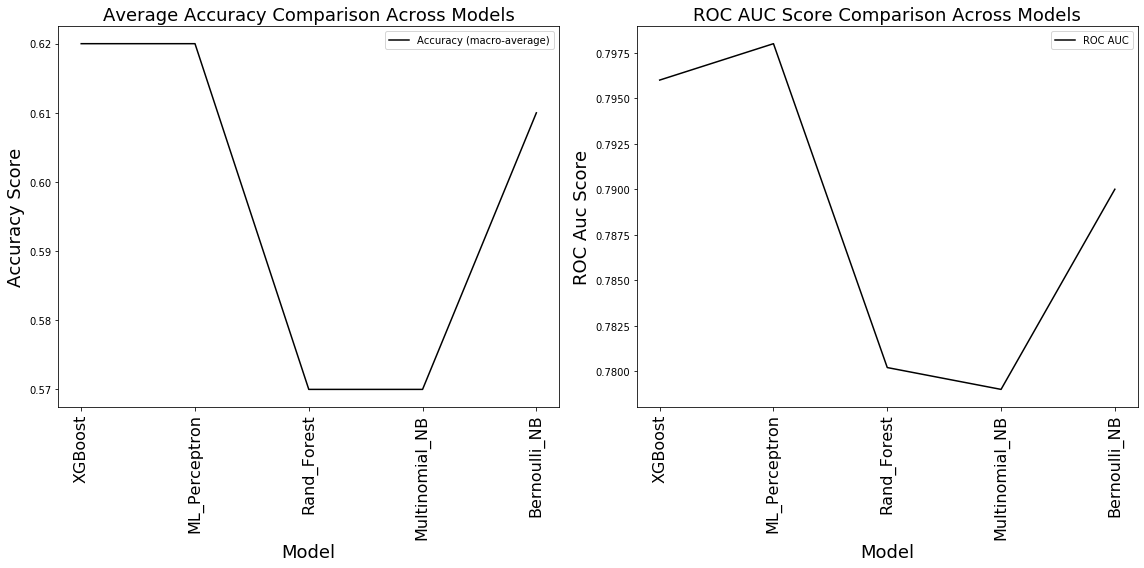

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (16,8))


ax[0].plot(comp['Model'], comp['Avg Accuracy'], color = 'black', label = 'Accuracy (macro-average)')
ax[0].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[0].set_title('Average Accuracy Comparison Across Models' , fontsize = 18)
ax[0].set_xlabel('Model', fontsize = 18)
ax[0].set_ylabel('Accuracy Score', fontsize = 18)
ax[0].legend()

ax[1].plot(comp['Model'], comp['ROC AUC Score'], color = 'black', label = 'ROC AUC')
ax[1].set_xticklabels(comp['Model'],fontsize = 16 ,rotation = 90)
ax[1].set_title('ROC AUC Score Comparison Across Models' , fontsize = 18)
ax[1].set_xlabel('Model', fontsize = 18)
ax[1].set_ylabel('ROC Auc Score', fontsize = 18)
ax[1].legend()
fig.tight_layout()
fig.savefig('../images/Accuracy_roc_comparison.jpeg');


## Looking at Threshold

Observation: XGBoost does really gooda t predicting neutral correctly and okay at predicting positive.  But a lot of the true negatives are labeled as neutral.  A good amount of the ture positives are also labeled as neutral.

Random forest has same issue but is better at detecting true negatives than other models.


In [37]:
#Look at true negatives

xb_tn = xb_predictions[xb_predictions['true']=='negative']
xb_tn.head()

,negative_prob,neutral_prob,positive_prob,predicted,true
4,0.229388,0.427607,0.343006,neutral,negative
5,0.608582,0.206032,0.185387,negative,negative
7,0.477018,0.297038,0.225944,negative,negative
8,0.669769,0.123923,0.206308,negative,negative
9,0.403846,0.162307,0.433847,positive,negative


In [38]:
colors2 = ['indianred', 'lightgrey', 'powderblue' ]

In [39]:
num_array = LabelEncoder().fit_transform(xb_tn['predicted'])
color_preds = np.array(colors2)[num_array]

''

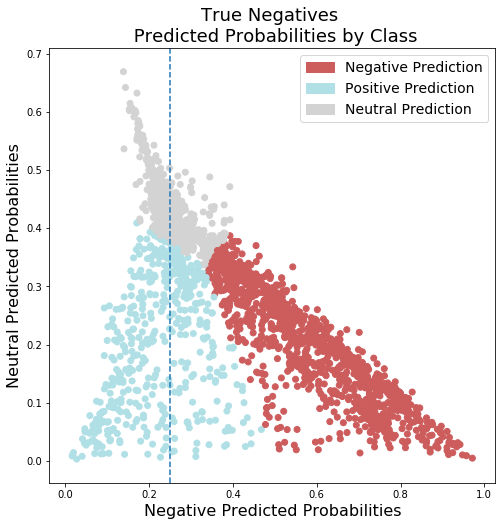

In [40]:
#Plot shows True Negatives
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_tn['negative_prob'], xb_tn['neutral_prob'], color = color_preds)
ax.set_title('True Negatives \n Predicted Probabilities by Class', fontsize = 18)
ax.set_xlabel('Negative Predicted Probabilities', fontsize = 16)
ax.set_ylabel('Neutral Predicted Probabilities', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 1)
ax.axvline(x = 0.25, linestyle = 'dashed')
fig.savefig('../images/True_negatives.jpeg')
;


What would happen if we set a threshold for negative class if probability was higher than 0.2? 

In [41]:
xb_neg_thresh = xb_predictions

In [42]:
xb_neg_thresh['adj_pred'] = np.where(xb_neg_thresh['negative_prob']>0.25, 'negative', xb_neg_thresh['predicted'])

In [43]:
colors

['indianred', 'lightgrey', 'powderblue']

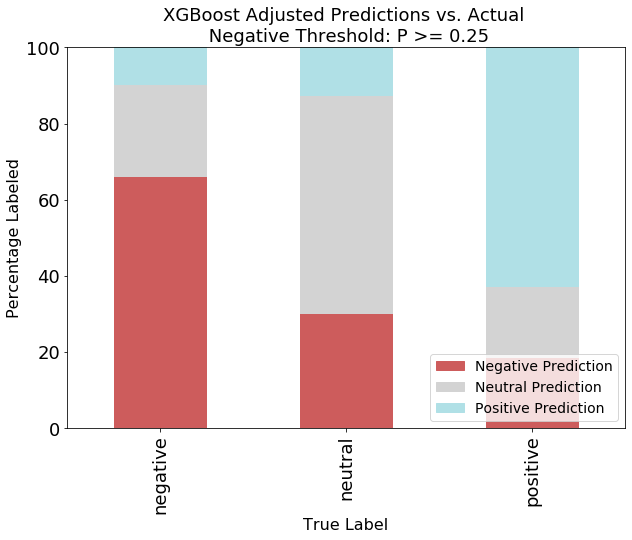

In [44]:
xb_adj_counts = xb_neg_thresh.groupby(['true', 'adj_pred']).size().reset_index()
xb_pivot_adj = xb_adj_counts.pivot(index='true', columns='adj_pred', values=0)

xb_pct = xb_pivot_adj
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100


xb_pct.loc[:,['negative_pred', 'neutral_pred', 'positive_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold: P >= 0.25', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,gray, blue], fontsize = 14, loc = 4)
plt.savefig('../images/XGB_predictions_adjusted.jpeg')
plt.ylim(0, 100);

In [45]:
xb_conf_matrix_adj = xb_pivot_adj.drop(columns = ['total', 'negative','neutral', 'positive'])
cs = xb_conf_matrix_adj.columns.tolist()
cs = ['negative', 'neutral', 'positive']
xb_conf_matrix_adj.columns = cs
xb_conf_matrix_adj.round(decimals = 2)

,negative,neutral,positive
true,,,
negative,65.85,24.23,9.92
neutral,29.96,57.37,12.67
positive,18.26,18.81,62.93


''

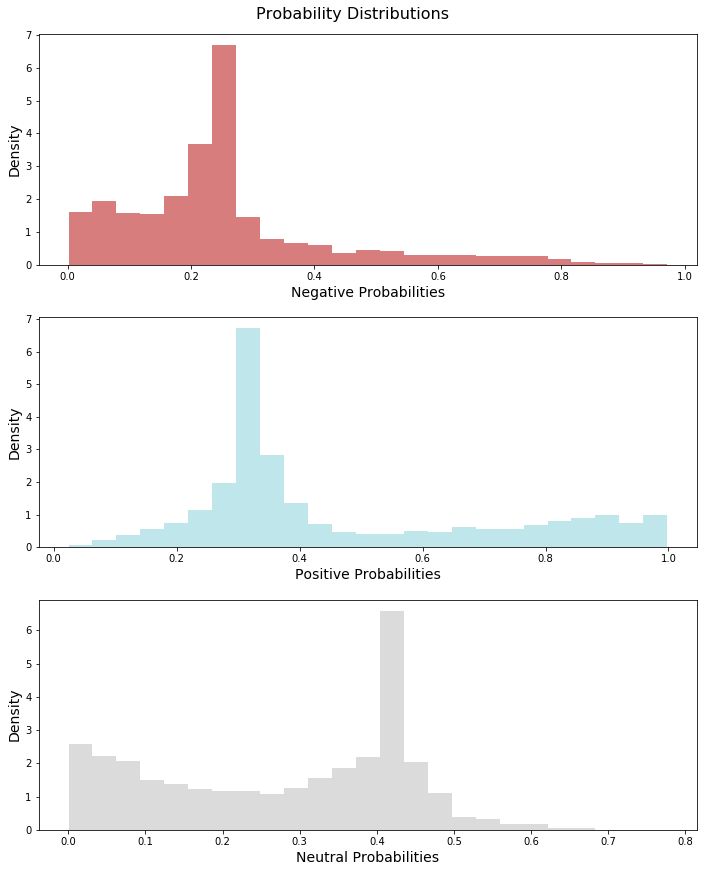

In [46]:
fig, ax = plt.subplots(3, figsize = (10, 12))
fig.suptitle('Probability Distributions', y = 1.01, fontsize = 16)
ax[0].hist(xb_predictions['negative_prob'], color = 'indianred', alpha = 0.8, bins = 25, density = True)
ax[0].set_xlabel('Negative Probabilities', fontsize = 14)
ax[0].set_ylabel('Density', fontsize = 14)
ax[1].hist(xb_predictions['positive_prob'], color = 'powderblue', alpha = 0.8, bins = 25, density = True)
ax[1].set_xlabel('Positive Probabilities', fontsize = 14)
ax[1].set_ylabel('Density', fontsize = 14)
ax[2].hist(xb_predictions['neutral_prob'], color = 'lightgray', alpha = 0.8, bins = 25, density = True)
ax[2].set_xlabel('Neutral Probabilities', fontsize = 14)
ax[2].set_ylabel('Density', fontsize = 14)
fig.tight_layout(pad = 1.5)
fig.savefig('../images/probability_distributions')
;

#What if we Lowered the threshold for calling something neutral? 


''

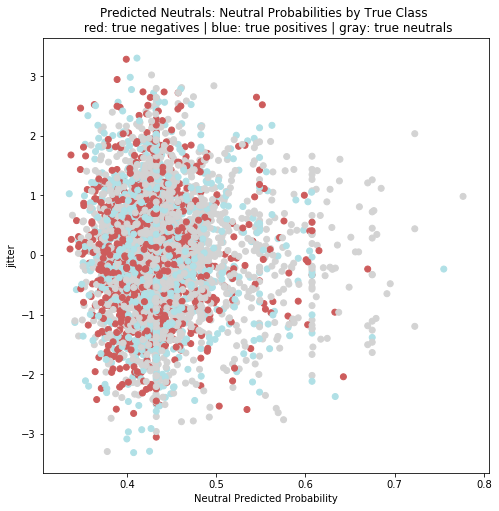

In [47]:
#data of everything labeled neutral
xb_neut_label = xb_predictions[xb_predictions['predicted']=='neutral']

num_array = LabelEncoder().fit_transform(xb_neut_label['true'])
color_true = np.array(colors2)[num_array]


#Plot shows Predicted Neutrals.  Colors represent true values

jitter =np.random.normal(size = len(num_array))

fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(xb_neut_label['neutral_prob'], jitter, color = color_true)
ax.set_title('Predicted Neutrals: Neutral Probabilities by True Class \n red: true negatives | blue: true positives | gray: true neutrals')
ax.set_xlabel('Neutral Predicted Probability')
ax.set_ylabel('jitter')
fig.savefig('../images/predicted_neutrals.jpeg')
;

What if we only predict neutral if the neutral predicted probability is above 0.45? 

In [48]:
neut_thresh = xb_predictions


p_or_n = np.where(neut_thresh['negative_prob']>neut_thresh['positive_prob'], 'negative', 'positive')

neut_thresh['p_or_n'] = p_or_n

neut_thresh['neut_wt_pred'] = np.where(neut_thresh['neutral_prob']<0.40, p_or_n, xb_neg_thresh['adj_pred'])
neut_thresh = neut_thresh.drop(columns = ['p_or_n'])

neut_thresh

,negative_prob,neutral_prob,positive_prob,predicted,true,adj_pred,neut_wt_pred
0,0.237785,0.432915,0.329300,neutral,neutral,neutral,neutral
1,0.170718,0.184875,0.644407,positive,positive,positive,positive
2,0.046333,0.053068,0.900599,positive,positive,positive,positive
3,0.399126,0.324173,0.276701,negative,positive,negative,negative
4,0.229388,0.427607,0.343006,neutral,negative,neutral,neutral
...,...,...,...,...,...,...,...
11597,0.237785,0.432915,0.329300,neutral,positive,neutral,neutral
11598,0.227374,0.457744,0.314882,neutral,neutral,neutral,neutral
11599,0.357898,0.346007,0.296094,negative,negative,negative,negative
11600,0.196186,0.357179,0.446634,positive,positive,positive,positive


In [49]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)


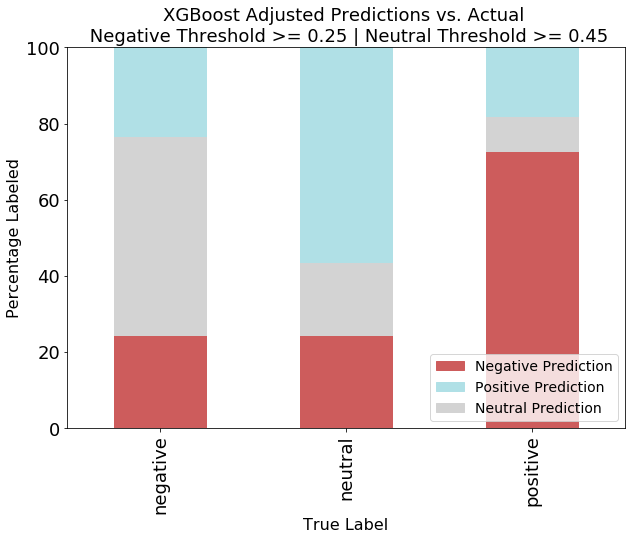

''

In [50]:
neut_wt_counts = neut_thresh.groupby(['true', 'neut_wt_pred']).size().reset_index()
xb_pivot_neut = neut_wt_counts.pivot(index='true', columns='neut_wt_pred', values=0)

xb_pct = xb_pivot_neut
xb_pct['total'] = xb_pct['negative'] + xb_pct['positive'] + xb_pct['neutral']
xb_pct['negative_pred'] = xb_pct['negative']/xb_pct['total'] * 100
xb_pct['neutral_pred'] = xb_pct['neutral']/xb_pct['total'] * 100
xb_pct['positive_pred'] = xb_pct['positive']/xb_pct['total'] * 100

xb_pct.loc[:,['positive_pred','negative_pred', 'neutral_pred']].plot.bar(stacked=True, color=colors, figsize=(10,7), fontsize = 18)
plt.title('XGBoost Adjusted Predictions vs. Actual \n Negative Threshold >= 0.25 | Neutral Threshold >= 0.45', fontsize = 18)
plt.ylabel('Percentage Labeled', fontsize = 16)
plt.xlabel('True Label', fontsize = 16)
plt.legend(handles=[red,blue,gray], fontsize = 14, loc = 4)
plt.ylim(0, 100)
# plt.savefig('../images/XGB_predictions_adjusted_neutral_weight.jpeg')
plt.show()
;

In [51]:
xb_pivot_neut

neut_wt_pred,negative,neutral,positive,total,negative_pred,neutral_pred,positive_pred
true,,,,,,,
negative,1536,691,707,2934,52.351738,23.551466,24.096796
neutral,627,1842,782,3251,19.286373,56.659489,24.054137
positive,499,986,3932,5417,9.211741,18.201957,72.586302


In [52]:
xb_conf_matrix_adj = xb_pivot_neut.drop(columns = ['total', 'negative','neutral', 'positive'])
cs = xb_conf_matrix_adj.columns.tolist()
cs = ['negative', 'neutral', 'positive']
xb_conf_matrix_adj.columns = cs
xb_conf_matrix_adj.round(decimals = 2)



,negative,neutral,positive
true,,,
negative,52.35,23.55,24.10
neutral,19.29,56.66,24.05
positive,9.21,18.20,72.59


In [53]:
comp

,Model,Negative Precision,Neutral Precision,Positive Precision,Weighted-avg Precision,Negative Recall,Neutral Recall,Positive Recall,Weighted-avg Recall,Negative F1-Score,Neutral F1-Score,Positive F1-Score,Weighted-avg F1-Score,Avg Accuracy,ROC AUC Score
0,XGBoost,0.64,0.48,0.76,0.65,0.41,0.71,0.69,0.62,0.50,0.57,0.72,0.62,0.62,0.7960
1,ML_Perceptron,0.59,0.51,0.72,0.63,0.49,0.57,0.73,0.62,0.53,0.53,0.73,0.62,0.62,0.7980
2,Rand_Forest,0.63,0.42,0.86,0.68,0.37,0.85,0.52,0.57,0.46,0.56,0.65,0.58,0.57,0.7802
3,Multinomial_NB,0.64,0.47,0.58,0.57,0.36,0.28,0.86,0.57,0.46,0.35,0.69,0.54,0.57,0.7790
4,Bernoulli_NB,0.58,0.49,0.71,0.62,0.46,0.57,0.73,0.61,0.51,0.53,0.72,0.61,0.61,0.7900
